# Multiple Regression

Shows how to calculate just the best fit, or - using "statsmodels" - all the
corresponding statistical parameters.

Also shows how to make 3d plots.

Author: Thomas Haslwanter, Date:   April-2020

In [1]:
# The standard imports
%pylab inline
import pandas as pd
# For the 3d plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For the statistic
from statsmodels.formula.api import ols

Populating the interactive namespace from numpy and matplotlib


## Generate and show the data

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\baust\.pyenv\pyenv-win\versions\3.6.8\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\baust\.pyenv\pyenv-win\versions\3.6.8\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "E:\GitHub\statsintro_python\venv_win\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "E:\GitHub\statsintro_python\venv_win\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "E:\GitHub\statsintro_python\venv_win\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "E:\GitHub\statsintro_python\venv_win\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends

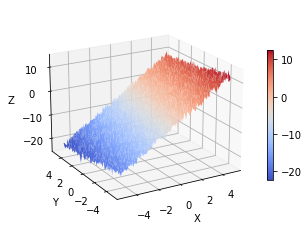

In [5]:
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

# Plot the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)

## Simple plane fit

In [3]:
M = np.vstack((np.ones(len(X)), X, Y)).T
bestfit = np.linalg.lstsq(M,Z, rcond=None)[0]
print('Best fit plane:', bestfit)

Best fit plane: [[-0.02334003 -0.02297475 -0.02266043 ...  0.01104194  0.01136536
   0.01158969]
 [-0.00488154 -0.00446989 -0.00502499 ... -0.00454972 -0.00469329
  -0.00512858]
 [-0.00488154 -0.00446989 -0.00502499 ... -0.00454972 -0.00469329
  -0.00512858]
 ...
 [-0.11203216 -0.11027878 -0.10877008 ...  0.0530013   0.05455373
   0.05563053]
 [-0.11436616 -0.11257626 -0.11103612 ...  0.0541055   0.05569027
   0.0567895 ]
 [-0.11670016 -0.11487373 -0.11330216 ...  0.05520969  0.05682681
   0.05794847]]


## Multilinear regression model

In [4]:
# calculate fit, P-values, confidence intervals etc.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
# Convert the data into a Pandas DataFrame
df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})

# Fit the model
model = ols("z ~ x + y", df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.931e+05
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:47:17   Log-Likelihood:                -14591.
No. Observations:               10201   AIC:                         2.919e+04
Df Residuals:                   10198   BIC:                         2.921e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0154      0.010   -500.747      0.0